### 0. customer csv 전처리

In [ ]:
import pandas as pd
customer= pd.read_csv('customer.csv')

# 0. 데이터 복사
customer_data= customer.copy()

# 1. 고객 성, 고객 이름, 유저 네임, 디바이스 id, 고객 나라 삭제
customer_data= customer_data.drop(['first_name', 'last_name', 'username', 'device_id', 'home_country'], axis= 1)

# 2. 이메일 플랫폼 이름만 남김
customer_data['email']= customer_data['email'].apply(lambda x: x.split('@')[1]) # @ 이후만 남김
customer_data['email']= customer_data['email'].apply(lambda x: x.split('.')[0]) # . 전만 남김

# 3. 날짜 타입으로 변환
customer_data['birthdate']= pd.to_datetime(customer_data['birthdate'])
customer_data['first_join_date']= pd.to_datetime(customer_data['first_join_date'])

# 4. iOS 기종만 휴대폰인지 아이패드인지 구분
customer_data.loc[customer_data['device_type']=='iOS', 'device_version']= customer_data.loc[customer_data['device_type']=='iOS', 'device_version'].apply(lambda x: x.split(';')[0])

# 5. age 나이 열 추가
last_date= pd.to_datetime('2022-08-31')
customer_data['age']= ((last_date - customer_data['birthdate']).dt.days) // 365

# 6. join_total_date 가입 기간
customer_data['join_total_date']= last_date - customer_data['first_join_date']

# 7. csv 파일 내보내기
customer_data.to_csv('customer_data.csv', index=False)

### 0. product csv 전처리

In [ ]:
import pandas as pd
product= pd.read_csv('product.csv', on_bad_lines= 'skip')

# 0. 데이터 복사
product_data= product.copy()

# 1. 결측치 채우기
'''
    - baseColour : 15개
    - season : 21개
    - usage : 317개
    - year : 1개
    - productDisplayName : 7개
'''
product_data.loc[[6206, 12763, 15708, 20209, 34553], 'baseColour'].fillna('Blue', inplace= True) # 해당 인덱스의 productDisplayName에 Blue가 있다.
product_data.loc[9516, 'baseColour']= 'Black' # 해당 인덱스의 productDisplayName에 Black이 있다.
product_data['baseColour'].fillna('Blue', inplace=True) # 나머지가 rticleType에서 Perfume and Body Mist인데 가장 많은 baseColour가 Blue이다
product_data['season'].fillna('Summer', inplace= True) # articleType에서 'Sports Shoes' 중 여름이 가장 많았고 티셔츠 하나 있었는데 민소매였다
product_data['usage'].fillna('Casual', inplace= True) # masterCategory의 Personal Care, Accessories, Apparel, Footwear가 결측치였는데 모두 Casual이 많았다.
product_data['year'].fillna(2011, inplace= True) # productDisplayName에서 'Puma Men'을 포함하고 있는 행의 year 중 2011이 가장 많았다
product_data['productDisplayName'].fillna('None', inplace= True) # 다른 열에서 설명되고 있으므로 없어도 된다고 판단했다

# 2. year열을 정수 타입으로 변환
product_data['year']= product_data['year'].astype(int)

# 3. productDisplayName 삭제
product_data= product_data.drop('productDisplayName', axis= 1)

# 3. csv 파일로 내보내기
product_data.to_csv('product_data.csv', index=False)

### 0. transaction csv 전처리

import pandas as pd
transaction= pd.read_csv('transaction_new.csv')

# 0. 데이터 복사
transaction_data= transaction.copy()

# 1. created_at를 날짜와 시간으로 분리하여 새로운 컬럼 생성
transaction_data['booking_date']= transaction_data['created_at'].apply(lambda x: x.split('T')[0]) # T를 기준으로 날짜 저장
transaction_data['booking_time']= transaction_data['created_at'].apply(lambda x: x.split('T')[1]) # T를 기준으로 시간 저장
transaction_data['booking_time']= transaction_data['booking_time'].apply(lambda x: x.split('.')[0]) # 시간에서 필요없는 뒷부분 삭제

# 2. booking_date와 booking_time을 각 날짜와 시간 데이터로 변경
transaction_data['booking_date']= pd.to_datetime(transaction_data['booking_date'])
transaction_data['booking_time']= pd.to_datetime(transaction_data['booking_time']) # 시간을 우선 날짜타입으로 변경
# transaction_data['booking_time']= transaction_data['booking_time'].dt.strftime('%H:%M:%S') # 시간만 남긴다 이거는 보류

# 3. created_at 날짜와 시간 분리했으니까 삭제 and booking_id는 아무 접접이 없다고 판단되어 삭제 처리
transaction_data= transaction_data.drop(['created_at', 'booking_id'], axis= 1)

# customer_id를 기준으로 위도, 경도가 같으면 transaction_data에 고객 지역을 넣고 없다면 결측치로 둔다(보류)

# 4. promo_data 결측치 부분은 할인 코드가 적용되지 않았다고 생각하여 No_promo 라고 채워넣는다
transaction_data['promo_code']= transaction_data['promo_code'].fillna('No_promo')

# 5. shipment_date_limit를 날짜와 시간으로 분리하여 새로운 컬럼 생성
transaction_data['shipment_date']= transaction_data['shipment_date_limit'].apply(lambda x: x.split('T')[0]) # T를 기준으로 날짜 저장
transaction_data['shipment_time']= transaction_data['shipment_date_limit'].apply(lambda x: x.split('T')[1]) # T를 기준으로 시간 저장
transaction_data['shipment_time']= transaction_data['shipment_time'].apply(lambda x: x.split('.')[0]) # 시간에서 필요없는 뒷부분 삭제

# 6. shipment_date와 shipment_time을 각 날짜와 시간 데이터로 변경
transaction_data['shipment_date']= pd.to_datetime(transaction_data['shipment_date'])
transaction_data['shipment_time']= pd.to_datetime(transaction_data['shipment_time']) # 시간을 우선 날짜타입으로 변경
# transaction_data['shipment_time']= transaction_data['shipment_time'].dt.strftime('%H:%M:%S') # 시간만 남긴다(보류)

# 7. shipment_date_limit를 분리했으니까 삭제처리
transaction_data= transaction_data.drop(['shipment_date_limit'], axis= 1)

# 8. csv 파일로 내보내기
transaction_data.to_csv('transaction_data.csv', index=False)

### 0. click csv 전처리

In [ ]:
import pandas as pd
click= pd.read_csv('click_stream_new.csv')

# 0. 데이터 복사
click_data= click.copy()

# 1. 날짜 쪼개기
click_data['event_date']= click_data['event_time'].apply(lambda x: x.split('T')[0])
click_data['event_time']= click_data['event_time'].apply(lambda x: x.split('T')[1])
click_data['event_time']= click_data['event_time'].apply(lambda x: x.split('.')[0])

# 2. event_id 는 필요없을거 같아서 삭제
click_data= click_data.drop('event_id', axis= 1)

# 3. click_source 테이블 생성
click_source= click_data[['session_id', 'event_name', 'event_date', 'event_time', 'traffic_source']]

# 4. csv로 내보내기
click_source.to_csv('click_source.csv', index=False)

### 0. click csv에서 search만 분리

In [ ]:
search= click_data[['session_id', 'event_date', 'event_time', 'traffic_source', 'search_keywords']]
search= search.dropna().reset_index(drop=True)

# csv로 내보내기
search.to_csv('search.csv', index=False)

### 0. 파일 불러오기

In [2]:
import pandas as pd
transaction_t= pd.read_csv('./csv_file/transaction_t.csv')
product= pd.read_csv('./csv_file/product_data.csv')
search= pd.read_csv('./csv_file/search.csv')
customer= pd.read_csv('./csv_file/customer_data.csv')

### 0. 결재 성공 / 실패 데이터 분리

In [3]:
transaction_t_s= transaction_t[transaction_t['payment_status'] == 'Success']
transaction_t_f= transaction_t[transaction_t['payment_status'] == 'Failed']

### 0. 연도별 분리

In [4]:
ns16= transaction_t_s[transaction_t_s['created_at'].apply(lambda x: x[:4]) == '2016']
ns17= transaction_t_s[transaction_t_s['created_at'].apply(lambda x: x[:4]) == '2017']
ns18= transaction_t_s[transaction_t_s['created_at'].apply(lambda x: x[:4]) == '2018']
ns19= transaction_t_s[transaction_t_s['created_at'].apply(lambda x: x[:4]) == '2019']
ns20= transaction_t_s[transaction_t_s['created_at'].apply(lambda x: x[:4]) == '2020']
ns21= transaction_t_s[transaction_t_s['created_at'].apply(lambda x: x[:4]) == '2021']
ns22= transaction_t_s[transaction_t_s['created_at'].apply(lambda x: x[:4]) == '2022']

### 0. 전체 연도 고객 구매 횟수 분리

In [5]:
from collections import Counter
id_cnt= Counter(transaction_t_s['customer_id'])

id_1= []
id_2= []
id_3= []
id_4= []
id_many= []

for id, cnt in id_cnt.items():
    if cnt == 1:
        id_1.append(id) 
    elif cnt == 2:
        id_2.append(id)
    elif cnt == 3:
        id_3.append(id)
    elif cnt == 4:
        id_4.append(id)
    else:
        id_many.append(id)

### 1. 일회성 고객 비율

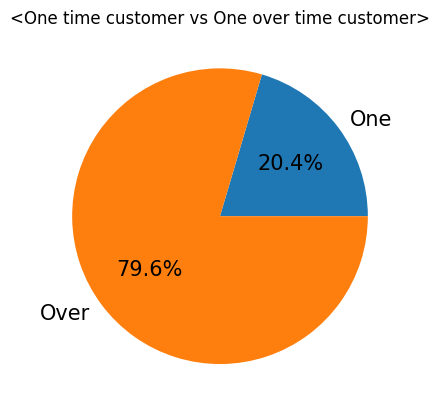

In [6]:
import matplotlib.pyplot as plt
ratio= [len(id_1), len(set(transaction_t_s['customer_id']))-len(id_1)]
labels= ['One', 'Over']

plt.pie(ratio, labels=labels, autopct='%.1f%%', textprops= {'size': 15})
plt.title('<One time customer vs One over time customer>')
plt.show()

### 0. 연도별 고객 구매 횟수 분리

In [7]:
from collections import Counter
id_cnt_16= Counter(ns16['customer_id'])

id_1_16= []
id_2_16= []
id_3_16= []
id_4_16= []
id_many_16= []

for id, cnt in id_cnt_16.items():
    if cnt == 1:
        id_1_16.append(id) 
    elif cnt == 2:
        id_2_16.append(id)
    elif cnt == 3:
        id_3_16.append(id)
    elif cnt == 4:
        id_4_16.append(id)
    else:
        id_many_16.append(id)

id_cnt_17= Counter(ns17['customer_id'])

id_1_17= []
id_2_17= []
id_3_17= []
id_4_17= []
id_many_17= []

for id, cnt in id_cnt_17.items():
    if cnt == 1:
        id_1_17.append(id) 
    elif cnt == 2:
        id_2_17.append(id)
    elif cnt == 3:
        id_3_17.append(id)
    elif cnt == 4:
        id_4_17.append(id)
    else:
        id_many_17.append(id)

id_cnt_18= Counter(ns18['customer_id'])

id_1_18= []
id_2_18= []
id_3_18= []
id_4_18= []
id_many_18= []

for id, cnt in id_cnt_18.items():
    if cnt == 1:
        id_1_18.append(id) 
    elif cnt == 2:
        id_2_18.append(id)
    elif cnt == 3:
        id_3_18.append(id)
    elif cnt == 4:
        id_4_18.append(id)
    else:
        id_many_18.append(id)

id_cnt_19= Counter(ns19['customer_id'])

id_1_19= []
id_2_19= []
id_3_19= []
id_4_19= []
id_many_19= []

for id, cnt in id_cnt_19.items():
    if cnt == 1:
        id_1_19.append(id) 
    elif cnt == 2:
        id_2_19.append(id)
    elif cnt == 3:
        id_3_19.append(id)
    elif cnt == 4:
        id_4_19.append(id)
    else:
        id_many_19.append(id)

id_cnt_20= Counter(ns20['customer_id'])

id_1_20= []
id_2_20= []
id_3_20= []
id_4_20= []
id_many_20= []

for id, cnt in id_cnt_20.items():
    if cnt == 1:
        id_1_20.append(id) 
    elif cnt == 2:
        id_2_20.append(id)
    elif cnt == 3:
        id_3_20.append(id)
    elif cnt == 4:
        id_4_20.append(id)
    else:
        id_many_20.append(id)

id_cnt_21= Counter(ns21['customer_id'])

id_1_21= []
id_2_21= []
id_3_21= []
id_4_21= []
id_many_21= []

for id, cnt in id_cnt_21.items():
    if cnt == 1:
        id_1_21.append(id) 
    elif cnt == 2:
        id_2_21.append(id)
    elif cnt == 3:
        id_3_21.append(id)
    elif cnt == 4:
        id_4_21.append(id)
    else:
        id_many_21.append(id)

id_cnt_22= Counter(ns22['customer_id'])

id_1_22= []
id_2_22= []
id_3_22= []
id_4_22= []
id_many_22= []

for id, cnt in id_cnt_22.items():
    if cnt == 1:
        id_1_22.append(id) 
    elif cnt == 2:
        id_2_22.append(id)
    elif cnt == 3:
        id_3_22.append(id)
    elif cnt == 4:
        id_4_22.append(id)
    else:
        id_many_22.append(id)

### 2. 연도별 일회성 고객 수(1)

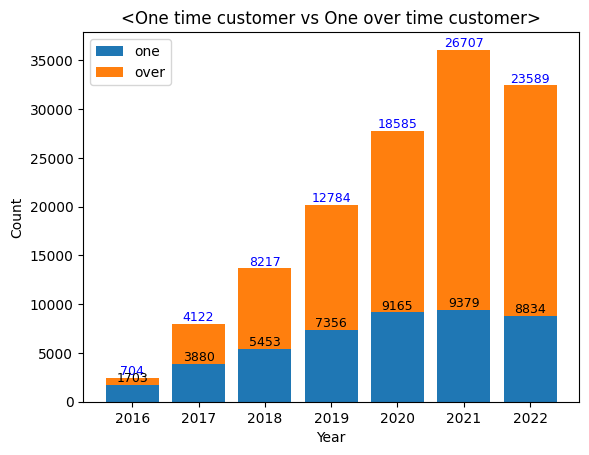

In [8]:
import matplotlib.pyplot as plt

x = ['2016', '2017', '2018', '2019', '2020', '2021', '2022']
y_stacked= [len(set(ns16['customer_id']))-len(id_1_16), len(set(ns17['customer_id']))-len(id_1_17), len(set(ns18['customer_id']))-len(id_1_18), 
len(set(ns19['customer_id']))-len(id_1_19), len(set(ns20['customer_id']))-len(id_1_20), len(set(ns21['customer_id']))-len(id_1_21), len(set(ns22['customer_id']))-len(id_1_22)]
y= [len(id_1_16), len(id_1_17), len(id_1_18), len(id_1_19), len(id_1_20), len(id_1_21), len(id_1_22)]

plt.bar(x, y, label='one')
plt.bar(x, y_stacked, label='over', bottom=y)
plt.ylabel('Count')
plt.xlabel('Year')
plt.title('<One time customer vs One over time customer>')

for i, v in enumerate(x):
    plt.text(v, y[i] + y_stacked[i], y_stacked[i],              
             fontsize=9, 
             color='blue',
             horizontalalignment='center',  
             verticalalignment='bottom')

    plt.text(v, y[i], y[i],              
             fontsize=9, 
             color='black',
             horizontalalignment='center',  
             verticalalignment='bottom')

plt.legend(loc='upper left')
plt.show()

### 2. 연도별 일회성 고객 수(2)

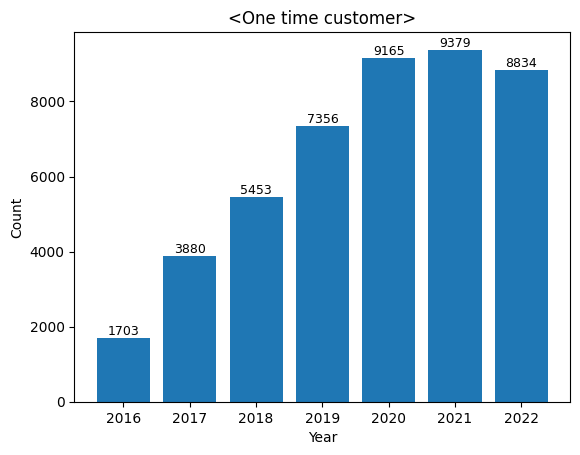

In [9]:
import matplotlib.pyplot as plt

x = ['2016', '2017', '2018', '2019', '2020', '2021', '2022']
y= [len(id_1_16), len(id_1_17), len(id_1_18), len(id_1_19), len(id_1_20), len(id_1_21), len(id_1_22)]

plt.bar(x, y, label='one')
plt.ylabel('Count')
plt.xlabel('Year')
plt.title('<One time customer>')

for i, v in enumerate(x):
    plt.text(v, y[i], y[i],              
             fontsize=9, 
             color='black',
             horizontalalignment='center',  
             verticalalignment='bottom')

plt.show()

### 3. 연도별 일회성 고객 비율 수

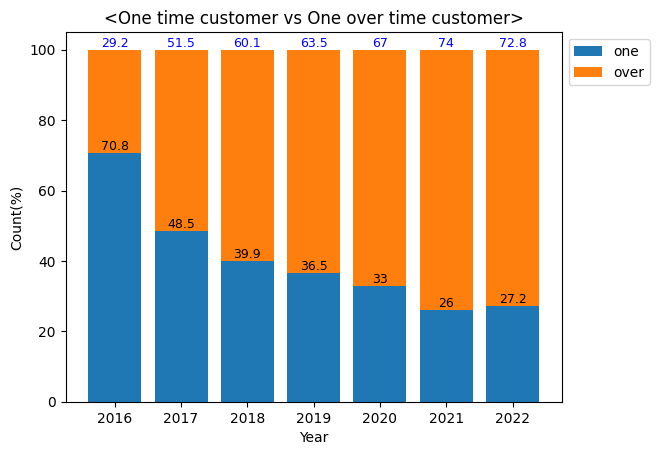

In [10]:
import matplotlib.pyplot as plt

x = ['2016', '2017', '2018', '2019', '2020', '2021', '2022']
y_stacked= [29.2, 51.5, 60.1, 63.5, 67, 74, 72.8]
y= [70.8, 48.5, 39.9, 36.5, 33, 26, 27.2]

plt.bar(x, y, label='one')
plt.bar(x, y_stacked, label='over', bottom=y)
plt.ylabel('Count(%)')
plt.xlabel('Year')
plt.title('<One time customer vs One over time customer>')

for i, v in enumerate(x):
    plt.text(v, y[i] + y_stacked[i], y_stacked[i],              
             fontsize=9, 
             color='blue',
             horizontalalignment='center',  
             verticalalignment='bottom')

    plt.text(v, y[i], y[i],              
             fontsize=9, 
             color='black',
             horizontalalignment='center',  
             verticalalignment='bottom')

plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

### 4. 프로모션 할인율

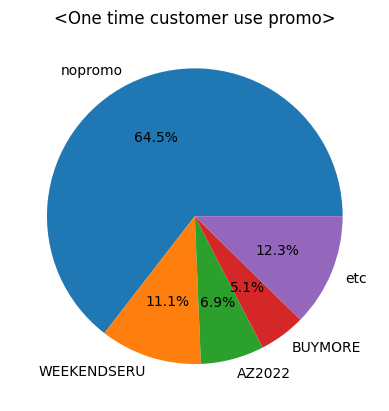

In [11]:
import matplotlib.pyplot as plt
ratio= [6622, 1143, 711, 520, 1267]
labels= ['nopromo', 'WEEKENDSERU','AZ2022','BUYMORE','etc']

plt.pie(ratio, labels=labels, autopct='%.1f%%')
plt.title('<One time customer use promo>')
plt.show()

In [388]:
transaction_t_s[transaction_t_s['customer_id'].isin(id_1)]['promo_code'].value_counts()

promo_code
nopromo          6622
WEEKENDSERU      1143
AZ2022            711
BUYMORE           520
LIBURDONG         363
WEEKENDMANTAP     361
XX2022            353
SC2022             95
STARTUP            95
Name: count, dtype: int64

### 0. 나이 분리

In [8]:
age_list = list(customer[customer['customer_id'].isin(id_1)]['age'].values)

age_0 = 0
age_10 = 0
age_20 = 0
age_30 = 0
age_40 = 0
age_50 = 0
age_60 = 0
age_70 = 0
age_above_70 = 0

for i in age_list:
    if i < 10:
        age_0 += 1
    elif i < 20:
        age_10 += 1
    elif i < 30:
        age_20 += 1
    elif i < 40:
        age_30 += 1
    elif i < 50:
        age_40 += 1
    elif i < 60:
        age_50 += 1
    elif i < 70:
        age_60 += 1
    else:
        age_above_70 += 1

### 5. 연도별 나이 수

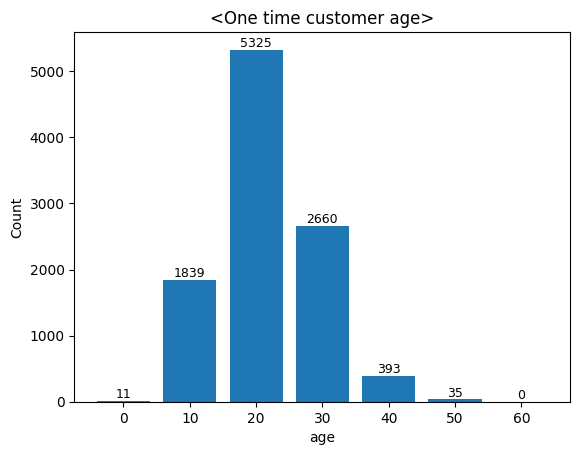

In [14]:
import matplotlib.pyplot as plt

x = ['0', '10', '20', '30', '40', '50', '60']
y= [age_0, age_10, age_20, age_30, age_40, age_50, age_60]

plt.bar(x, y, label='one')
plt.ylabel('Count')
plt.xlabel('age')
plt.title('<One time customer age>')

for i, v in enumerate(x):
    plt.text(v, y[i], y[i],              
             fontsize=9, 
             color='black',
             horizontalalignment='center',  
             verticalalignment='bottom')

plt.show()

### 6. 서브카테고리 비율

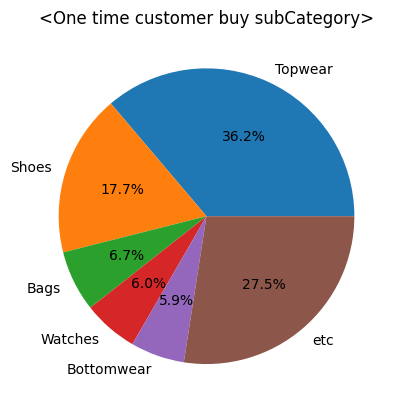

In [15]:
import matplotlib.pyplot as plt
ratio= [3171,1554,585,528,517,2405]
labels= ['Topwear', 'Shoes', 'Bags', 'Watches', 'Bottomwear', 'etc']

plt.pie(ratio, labels=labels, autopct='%.1f%%')
plt.title('<One time customer buy subCategory>')
plt.show()

In [24]:
product[product['id'].isin(list(set(transaction_t_s[transaction_t_s['customer_id'].isin(id_1)]['product_id'])))]['subCategory'].value_counts()

subCategory
Topwear                     3171
Shoes                       1554
Bags                         585
Watches                      528
Bottomwear                   517
Innerwear                    358
Jewellery                    242
Flip Flops                   203
Eyewear                      198
Sandal                       198
Fragrance                    192
Belts                        176
Wallets                      170
Socks                        136
Loungewear and Nightwear     110
Lips                         105
Saree                        102
Dress                        100
Makeup                        75
Nails                         66
Ties                          57
Headwear                      56
Accessories                   29
Scarves                       28
Cufflinks                     25
Free Gifts                    23
Apparel Set                   18
Skin Care                     17
Stoles                        17
Skin                          1

### 7. 메인 카테고리 비율

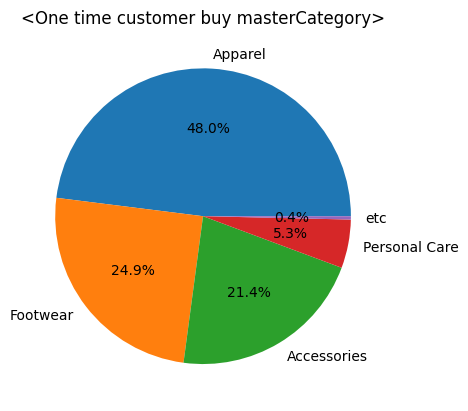

In [21]:
import matplotlib.pyplot as plt
ratio= [4378,2268,1955,484,33]
labels= ['Apparel', 'Footwear', 'Accessories', 'Personal Care', 'etc']

plt.pie(ratio, labels=labels, autopct='%.1f%%')
plt.title('<One time customer buy masterCategory>')
plt.show()

In [20]:
product[product['id'].isin(list(set(transaction_t_s[transaction_t_s['customer_id'].isin(id_1)]['product_id'])))]['masterCategory'].value_counts()

masterCategory
Apparel           4378
Accessories       2268
Footwear          1955
Personal Care      484
Free Items          24
Sporting Goods       9
Name: count, dtype: int64

### 8. 세부항목 비율

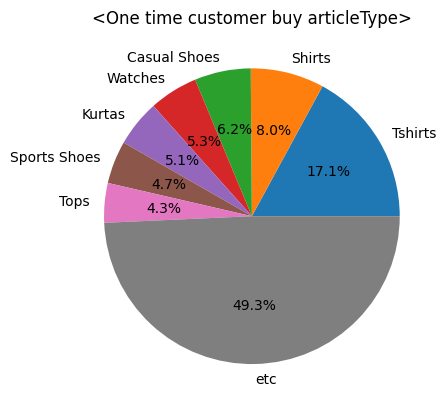

In [19]:
import matplotlib.pyplot as plt
ratio= [766,361,276,239,229,210,194,2211]
labels= ['Tshirts', 'Shirts', 'Casual Shoes', 'Watches', 'Kurtas', 'Sports Shoes', 'Tops', 'etc']

plt.pie(ratio, labels=labels, autopct='%.1f%%')
plt.title('<One time customer buy articleType>')
plt.show()

In [23]:
product[product['id'].isin(list(set(transaction_t_s[transaction_t_s['customer_id'].isin(id_1)]['product_id'])))]['articleType'].value_counts()

articleType
Tshirts           1427
Shirts             669
Casual Shoes       611
Watches            528
Sports Shoes       414
                  ... 
Lounge Tshirts       1
Robe                 1
Trolley Bag          1
Body Lotion          1
Ipad                 1
Name: count, Length: 132, dtype: int64

### 9. 일회성 고객 중 결재 실패 비율

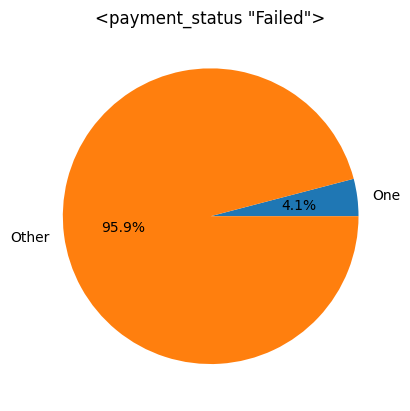

In [32]:
import matplotlib.pyplot as plt
ratio= [len(transaction_t_f[transaction_t_f['customer_id'].isin(id_1)]['customer_id']), len(set(transaction_t_f['customer_id']))]
labels= ['One', 'Other']

plt.pie(ratio, labels=labels, autopct='%.1f%%')
plt.title('<payment_status "Failed">')
plt.show()

### 10. 일회성 고객 검색어

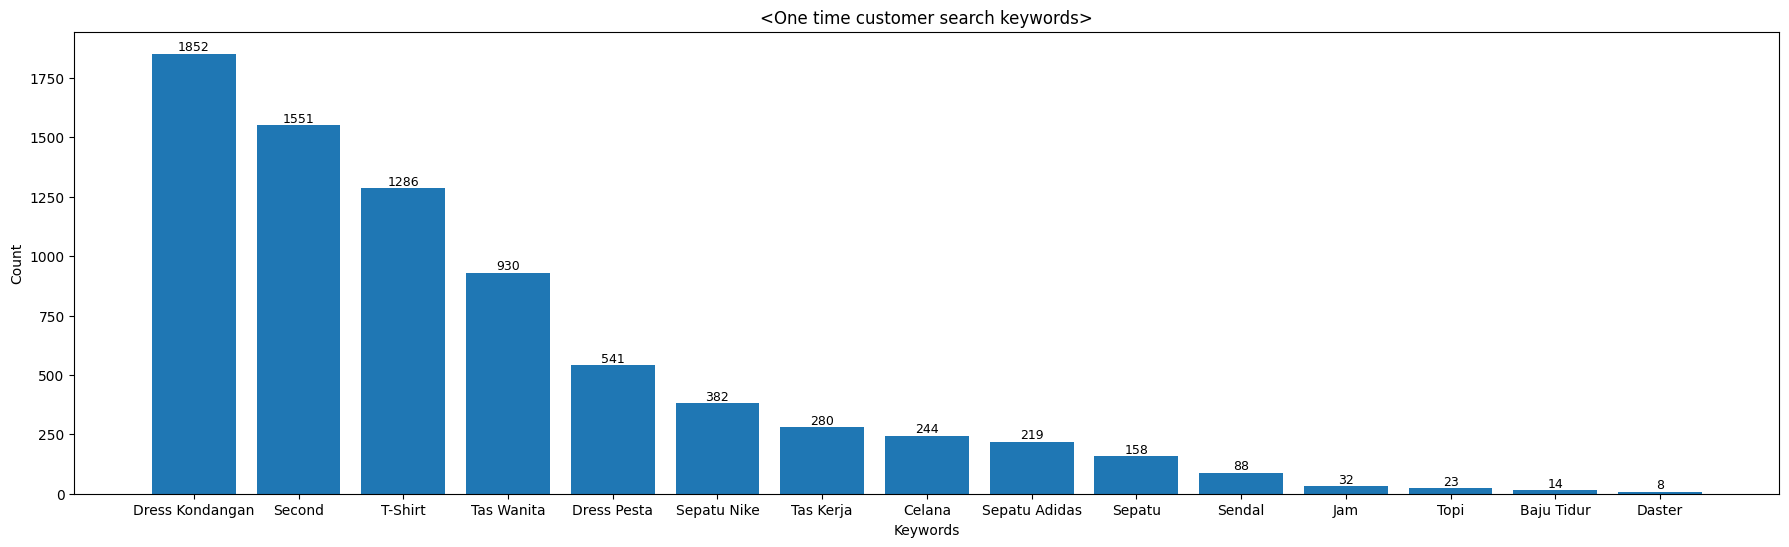

In [34]:
import matplotlib.pyplot as plt

x = ['Dress Kondangan', 'Second', 'T-Shirt', 'Tas Wanita', 'Dress Pesta', 'Sepatu Nike', 'Tas Kerja', 'Celana', 'Sepatu Adidas', 'Sepatu', 'Sendal', 'Jam', 'Topi', 'Baju Tidur', 'Daster']
y= [1852, 1551, 1286, 930, 541, 382, 280, 244, 219, 158, 88, 32, 23, 14, 8]

plt.figure(figsize=(22, 6))
plt.bar(x, y, label='one')
plt.ylabel('Count')
plt.xlabel('Keywords')
plt.title('<One time customer search keywords>')

for i, v in enumerate(x):
    plt.text(v, y[i], y[i],              
             fontsize=9, 
             color='black',
             horizontalalignment='center',  
             verticalalignment='bottom')
plt.show()

In [43]:
session_1_id= list(set(transaction_t_s[transaction_t_s['customer_id'].isin(id_1)]['session_id']))
search[search['session_id'].isin(session_1_id)]['search_keywords'].value_counts()

search_keywords
Dress Kondangan    1852
Tas Wanita          930
Bekas               757
T-Shirt             680
Kaos                566
Baju                558
Dress Pesta         541
Sepatu Nike         382
Tas Kerja           280
Sepatu Adidas       219
Thrift              204
Second Hand         203
Barang Bekas        202
Second              185
Celana Panjang      178
Sepatu              158
Sendal               88
Celana               66
T-shirt              40
Jam                  32
Topi                 23
Baju Tidur           14
Daster                8
Name: count, dtype: int64

### 11. 일회성 고객 결재 수단 비율

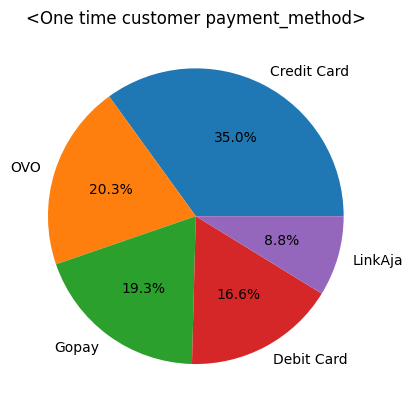

In [35]:
import matplotlib.pyplot as plt
labels= list(transaction_t_s[transaction_t_s['customer_id'].isin(id_1)]['payment_method'].value_counts().keys())
ratio= list(transaction_t_s[transaction_t_s['customer_id'].isin(id_1)]['payment_method'].value_counts())

plt.pie(ratio, labels=labels, autopct='%.1f%%')
plt.title('<One time customer payment_method>')
plt.show()

### 12. 일회성 고객 요일별 수

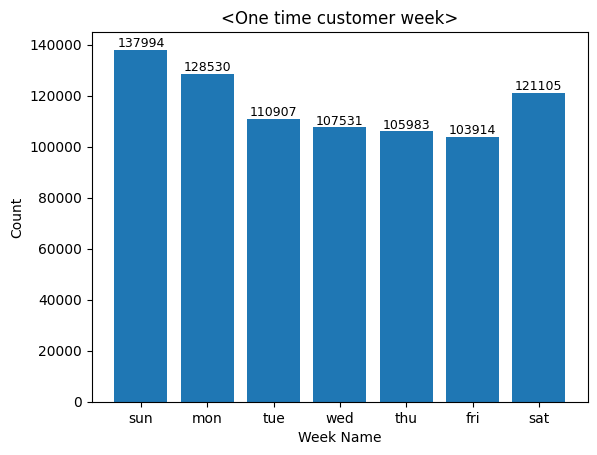

In [37]:
import matplotlib.pyplot as plt

x= ['sun', 'mon', 'tue', 'wed', 'thu', 'fri', 'sat']
y= [137994, 128530, 110907, 107531, 105983, 103914, 121105]

plt.bar(x, y, label='one')
plt.ylabel('Count')
plt.xlabel('Week Name')
plt.title('<One time customer week>')

for i, v in enumerate(x):
    plt.text(v, y[i], y[i],              
             fontsize=9, 
             color='black',
             horizontalalignment='center',  
             verticalalignment='bottom')
plt.show()

In [ ]:
from datetime import datetime

transaction_t_s['date']= transaction_t_s['created_at'].apply(lambda x: x.split(' ')[0])
date_format = "%Y-%m-%d"
transaction_t_s['value']= transaction_t_s['date'].apply(lambda x: datetime.strptime(x, date_format))

weekday_number = transaction_t_s['value'].dt.weekday
weekday_names = ["mon", "tue", "wed", "thu", "fri", "sat", "sun"]
weekday_string = weekday_number.apply(lambda x: weekday_names[x])
transaction_t_s['weekday'] = weekday_string

In [10]:
transaction_t_s['weekday'].value_counts()

weekday
sun    137994
mon    128530
sat    121105
tue    110907
wed    107531
thu    105983
fri    103914
Name: count, dtype: int64

### 13. 전체 연도 일회성 구매자 월별 수(1)

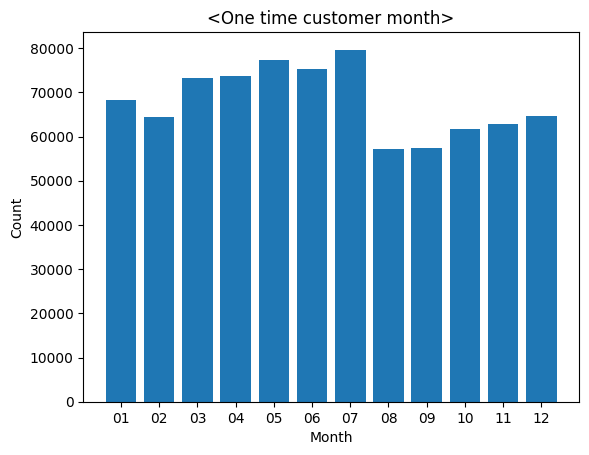

In [17]:
import matplotlib.pyplot as plt

x= ['01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12']
y= [68372, 64517, 73369, 73710, 77258, 75251, 79657, 57137, 57450, 61762, 62876, 64605]

plt.bar(x, y, label='one')
plt.ylabel('Count')
plt.xlabel('Month')
plt.title('<One time customer month>')

plt.show()

In [ ]:
transaction_t_s['month']= transaction_t_s['created_at'].apply(lambda x: x[5:7])

In [16]:
transaction_t_s['month'].value_counts()

month
07    79657
05    77258
06    75251
04    73710
03    73369
01    68372
12    64605
02    64517
11    62876
10    61762
09    57450
08    57137
Name: count, dtype: int64

### 13. 전체 연도 일회성 구매자 월별 수(2)

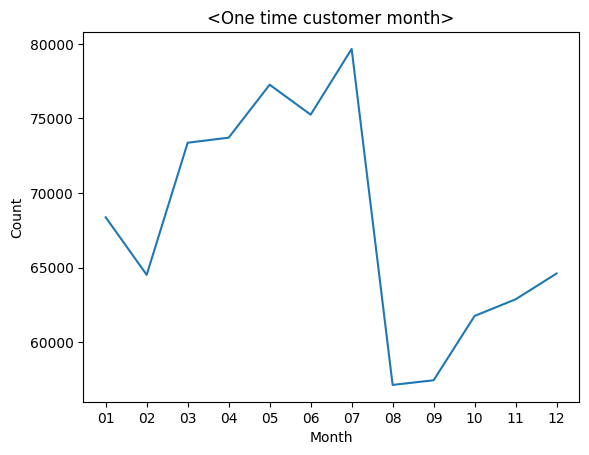

In [18]:
import matplotlib.pyplot as plt

x= ['01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12']
y= [68372, 64517, 73369, 73710, 77258, 75251, 79657, 57137, 57450, 61762, 62876, 64605]

plt.plot(x, y, label='one')
plt.ylabel('Count')
plt.xlabel('Month')
plt.title('<One time customer month>')

plt.show()

### 14. 일회성O, 일회성X 고객 연도별 추이

In [33]:
one_row= transaction_t_s[transaction_t_s['customer_id'].isin(id_1)]

y22_one = [len(one_row[(one_row['date'].apply(lambda x: x[:4]) == '2022') & (one_row['date'].apply(lambda x: x[5:7]) == i)]['customer_id']) for i in ['01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12']]
no_one_22= [len(set(transaction_t_s[(transaction_t_s['date'].apply(lambda x: x[:4]) == '2022') & (transaction_t_s['date'].apply(lambda x: x[5:7]) == i)]['customer_id'])) for i in ['01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12']]
y22 = [l1 - l2 for l1, l2 in zip(no_one_22, y22_one)]

y21_one = [len(one_row[(one_row['date'].apply(lambda x: x[:4]) == '2021') & (one_row['date'].apply(lambda x: x[5:7]) == i)]['customer_id']) for i in ['01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12']]
no_one_21= [len(set(transaction_t_s[(transaction_t_s['date'].apply(lambda x: x[:4]) == '2021') & (transaction_t_s['date'].apply(lambda x: x[5:7]) == i)]['customer_id'])) for i in ['01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12']]
y21 = [l1 - l2 for l1, l2 in zip(no_one_21, y21_one)]

y20_one = [len(one_row[(one_row['date'].apply(lambda x: x[:4]) == '2020') & (one_row['date'].apply(lambda x: x[5:7]) == i)]['customer_id']) for i in ['01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12']]
no_one_20= [len(set(transaction_t_s[(transaction_t_s['date'].apply(lambda x: x[:4]) == '2020') & (transaction_t_s['date'].apply(lambda x: x[5:7]) == i)]['customer_id'])) for i in ['01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12']]
y20 = [l1 - l2 for l1, l2 in zip(no_one_20, y20_one)]

y19_one = [len(one_row[(one_row['date'].apply(lambda x: x[:4]) == '2019') & (one_row['date'].apply(lambda x: x[5:7]) == i)]['customer_id']) for i in ['01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12']]
no_one_19= [len(set(transaction_t_s[(transaction_t_s['date'].apply(lambda x: x[:4]) == '2019') & (transaction_t_s['date'].apply(lambda x: x[5:7]) == i)]['customer_id'])) for i in ['01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12']]
y19 = [l1 - l2 for l1, l2 in zip(no_one_19, y19_one)]

y18_one = [len(one_row[(one_row['date'].apply(lambda x: x[:4]) == '2018') & (one_row['date'].apply(lambda x: x[5:7]) == i)]['customer_id']) for i in ['01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12']]
no_one_18= [len(set(transaction_t_s[(transaction_t_s['date'].apply(lambda x: x[:4]) == '2018') & (transaction_t_s['date'].apply(lambda x: x[5:7]) == i)]['customer_id'])) for i in ['01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12']]
y18 = [l1 - l2 for l1, l2 in zip(no_one_18, y18_one)]

y17_one = [len(one_row[(one_row['date'].apply(lambda x: x[:4]) == '2017') & (one_row['date'].apply(lambda x: x[5:7]) == i)]['customer_id']) for i in ['01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12']]
no_one_17= [len(set(transaction_t_s[(transaction_t_s['date'].apply(lambda x: x[:4]) == '2017') & (transaction_t_s['date'].apply(lambda x: x[5:7]) == i)]['customer_id'])) for i in ['01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12']]
y17 = [l1 - l2 for l1, l2 in zip(no_one_17, y17_one)]

y16_one = [len(one_row[(one_row['date'].apply(lambda x: x[:4]) == '2016') & (one_row['date'].apply(lambda x: x[5:7]) == i)]['customer_id']) for i in ['01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12']]
no_one_16= [len(set(transaction_t_s[(transaction_t_s['date'].apply(lambda x: x[:4]) == '2016') & (transaction_t_s['date'].apply(lambda x: x[5:7]) == i)]['customer_id'])) for i in ['01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12']]
y16 = [l1 - l2 for l1, l2 in zip(no_one_16, y16_one)]

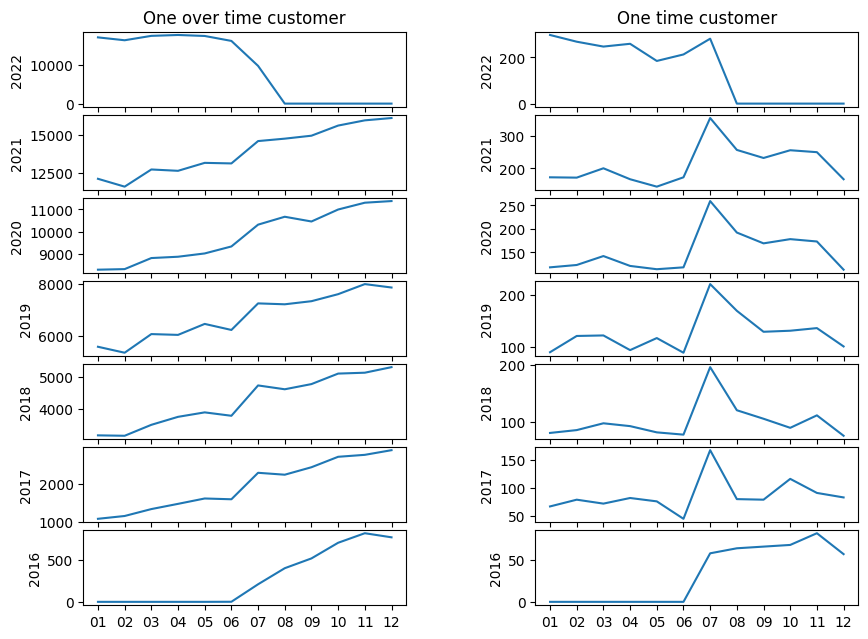

In [34]:
import matplotlib.pyplot as plt

x = ['01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12']


plt.figure(figsize=(10, 15))

# 2022
plt.subplot(14,2,1)
plt.plot(x, y22, label='y22')
plt.ylabel('2022')
plt.title('One over time customer')
plt.xticks(visible=False)

plt.subplot(14,2,2)
plt.plot(x, y22_one, label='y22_one')
plt.ylabel('2022')
plt.title('One time customer')
plt.xticks(visible=False)

# 2021
plt.subplot(14,2,3)
plt.plot(x, y21, label='y21')
plt.ylabel('2021')
plt.xticks(visible=False)

plt.subplot(14,2,4)
plt.plot(x, y21_one, label='y21_one')
plt.ylabel('2021')
plt.xticks(visible=False)

# 2020
plt.subplot(14,2,5)
plt.plot(x, y20, label='y20')
plt.ylabel('2020')
plt.xticks(visible=False)

plt.subplot(14,2,6)
plt.plot(x, y20_one, label='y20_one')
plt.ylabel('2020')
plt.xticks(visible=False)

# 2019
plt.subplot(14,2,7)
plt.plot(x, y19, label='191')
plt.ylabel('2019')
plt.xticks(visible=False)

plt.subplot(14,2,8)
plt.plot(x, y19_one, label='y19_one')
plt.ylabel('2019')
plt.xticks(visible=False)

# 2018
plt.subplot(14,2,9)
plt.plot(x, y18, label='y18')
plt.ylabel('2018')
plt.xticks(visible=False)

plt.subplot(14,2,10)
plt.plot(x, y18_one, label='y18_one')
plt.ylabel('2018')
plt.xticks(visible=False)

# 2017
plt.subplot(14,2,11)
plt.plot(x, y17, label='y17')
plt.ylabel('2017')
plt.xticks(visible=False)

plt.subplot(14,2,12)
plt.plot(x, y17_one, label='y17_one')
plt.ylabel('2017')
plt.xticks(visible=False)

# 2016
plt.subplot(14,2,13)
plt.plot(x, y16, label='y16')
plt.ylabel('2016')

plt.subplot(14,2,14)
plt.plot(x, y16_one, label='y16_one')
plt.ylabel('2016')

plt.subplots_adjust(wspace=0.4, hspace=0.1)
plt.xticks(x)
plt.show()